This Notebook is my submission to the Data Analyst Assignment for TJX Companies. The dataset will be cleaned and exploratory data analysis will be performed. This includes finding and purging duplicates, accounting for missing field values, and label manipulation. Then, more in depth analysis will be performed in order to provide recommendations to improve various business practices.

The first step is to import the dataset. This is done using pandas, specifically the `read_excel` function. The data is from the second sheet of the Excel file named `Data`.

In [1]:
import pandas as pd

df = pd.read_excel('DataAnalystQuestion.xlsx',sheet_name = "Data")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


View the first view entries to ensure proper importation and to gain a sense of the fields:

In [2]:
df.head()

,Department,Class,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
0,Casual Wear,Denim,24,64,64,0,1327.62,1327.62,0.0,5,5,0,114.95,114.95,0.0
1,Casual Wear,Denim,24X28,21,21,0,517.29,517.29,0.0,2,2,0,28.74,28.74,0.0
2,Casual Wear,Denim,24x30,73,68,5,1618.08,1518.08,100.0,4,0,4,75.00,0.00,75.0
3,Casual Wear,Denim,25,68,68,0,1495.58,1495.58,0.0,1,1,0,18.99,18.99,0.0
4,Casual Wear,Denim,25x28,64,64,0,1599.36,1599.36,0.0,2,2,0,49.98,49.98,0.0


The data appears to be imported correctly. It involves both standard and discount sales for various departments and clothes types. This is useful to reveal effectiveness of sales to perhaps shine light on systematic problems preventing profit within one Department or clothes type.

In [3]:
# view data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Department                  1746 non-null   object 
 1   Class                       1746 non-null   object 
 2   Size                        1688 non-null   object 
 3   Inventory Units             1746 non-null   int64  
 4   Full Price Inventory Units  1746 non-null   int64  
 5   Markdown Inventory Units    1746 non-null   int64  
 6   Inventory Value             1746 non-null   float64
 7   Full Price Inventory Value  1746 non-null   float64
 8   Markdown Inventory Value    1746 non-null   float64
 9   Units Sold                  1746 non-null   int64  
 10  Full Price Units Sold       1746 non-null   int64  
 11  Markdown Units Sold         1746 non-null   int64  
 12  Sales                       1746 non-null   float64
 13  Full Price Sales            1746 

There are seemingly 3 object (string) columns: `Department`, `Class`, and `Size`. Even though `Size` can be numeric, it represents a categorical variable. For this reason, its string classification is correct.

In [4]:
df.select_dtypes(include = 'object').head()

,Department,Class,Size
0,Casual Wear,Denim,24
1,Casual Wear,Denim,24X28
2,Casual Wear,Denim,24x30
3,Casual Wear,Denim,25
4,Casual Wear,Denim,25x28


# Missing Field Values

Firstly, null values will be searched for and handled.

In [5]:
nulls = df.isnull().sum() # columnwise sum
print(nulls)
null_col = nulls[nulls.values != 0].index[0]
print(f'There are {nulls.sum()} missing entries in the dataset appearing in the column(s) `{null_col}`.')

Department                     0
Class                          0
Size                          58
Inventory Units                0
Full Price Inventory Units     0
Markdown Inventory Units       0
Inventory Value                0
Full Price Inventory Value     0
Markdown Inventory Value       0
Units Sold                     0
Full Price Units Sold          0
Markdown Units Sold            0
Sales                          0
Full Price Sales               0
Markdown Sales                 0
dtype: int64
There are 58 missing entries in the dataset appearing in the column(s) `Size`.


Now, we can view the missing entries in the column that they appear.

In [6]:
df[df[null_col].isnull()].head(10)

,Department,Class,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
547,Handbags/Accessories,Backpack,NaN,1091,1022,69,47781.04,44545.28,3235.76,0,0,0,0.0,0.0,0.0
554,Handbags/Accessories,Evening/Clutch,NaN,2004,1431,573,73085.49,60043.14,13042.35,0,0,0,0.0,0.0,0.0
555,Handbags/Accessories,Hobos,NaN,2027,1866,161,107773.09,87291.09,20482.00,0,0,0,0.0,0.0,0.0
556,Handbags/Accessories,Italy,NaN,58,58,0,6509.43,6509.43,0.00,0,0,0,0.0,0.0,0.0
557,Handbags/Accessories,Luxury,NaN,5,5,0,2999.95,2999.95,0.00,0,0,0,0.0,0.0,0.0
569,Handbags/Accessories,Messenger/Xbody,NaN,5358,4843,515,235683.83,219197.23,16486.60,0,0,0,0.0,0.0,0.0
570,Handbags/Accessories,Satchels,NaN,7737,6368,1369,306853.17,268935.57,37917.60,0,0,0,0.0,0.0,0.0
571,Handbags/Accessories,SLG,NaN,3810,2648,1162,70851.52,55903.52,14948.00,0,0,0,0.0,0.0,0.0
572,Handbags/Accessories,Totes,NaN,5445,4430,1015,210485.21,188231.96,22253.25,0,0,0,0.0,0.0,0.0
1097,Men & Womens Athle,Walking,NaN,122,0,122,3897.60,0.00,3897.60,0,0,0,0.0,0.0,0.0


In [7]:
print(df[df[null_col].isnull()]['Size'].values[1],type(df[df[null_col].isnull()]['Size'].values[1]))

nan <class 'float'>


It is clear that these NaN values correspond to non-clothing items. Moreover, they are float type missplaced in a string field. To avoid confusion, this will be changed to a similar, non-NaN field value. 

In [8]:
import numpy as np
df['Size'] = df['Size'].replace({np.nan:'Not-Clothing'})

In [9]:
df['Size'].tail()

1741    Not-Clothing
1742    Not-Clothing
1743    Not-Clothing
1744    Not-Clothing
1745    Not-Clothing
Name: Size, dtype: object

However, another problem emerges:

In [10]:
df.select_dtypes(include = 'object').all()

Department     True
Class          True
Size          False
dtype: bool

The datatypes of the Size column are mixed, probably int and string types. There are to be all reassigned to the string type; as previously mentioned, they represent categorical variables.

In [11]:
# reassign
df['Size'] = df['Size'].apply(lambda x: str(x))

In [12]:
df.select_dtypes(include = 'object').all()

Department    True
Class         True
Size          True
dtype: bool

The rest of the 11 columns are numeric, evenly split with `int` (integers) and `float` (decimals). The floats were properly used to house dollar amounts, while the ints are fitting to house figures for the amounts of units. This can be viewed below: 

In [13]:
df.select_dtypes(include = ['int64','float64']).head()

,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
0,64,64,0,1327.62,1327.62,0.0,5,5,0,114.95,114.95,0.0
1,21,21,0,517.29,517.29,0.0,2,2,0,28.74,28.74,0.0
2,73,68,5,1618.08,1518.08,100.0,4,0,4,75.00,0.00,75.0
3,68,68,0,1495.58,1495.58,0.0,1,1,0,18.99,18.99,0.0
4,64,64,0,1599.36,1599.36,0.0,2,2,0,49.98,49.98,0.0


Thus, there is no further modification needed to the datatypes at this point.

# Duplicates

Next, duplicated values need to be found and purged.

In [14]:
df.duplicated()

print(f'There are {df.duplicated().sum()} duplicate entries in the dataset.')

There are 0 duplicate entries in the dataset.


This bodes well - All entries are unique.

# Categorical Column Visualization

Next, the values of the 10 most occurrent values of the categorical columns are explored:

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical(col_name, df):
    if df[col_name].dtypes == 'object':
        print(f'Categorical Column: {col_name}')
        print()

        # 10 highest values for readability
        print(df[col_name].value_counts()[:10])
        
        #sns count plot
        sns.set_theme(style="whitegrid")
        sns.countplot( data = df, y = col_name,order = df[col_name].value_counts().index[:10], color = 'crimson')
        plt.show()
        print()

Categorical Column: Department

Ladies Footwear             273
Men & Womens Athle          147
Contemporary                136
Best Brands Casual          107
Decorative Textiles         104
Mens Moderate Sportswear     97
Inf & Toddlers               88
Dresses/Ladies Suits         86
Activewear                   85
Women's Sizes                81
Name: Department, dtype: int64


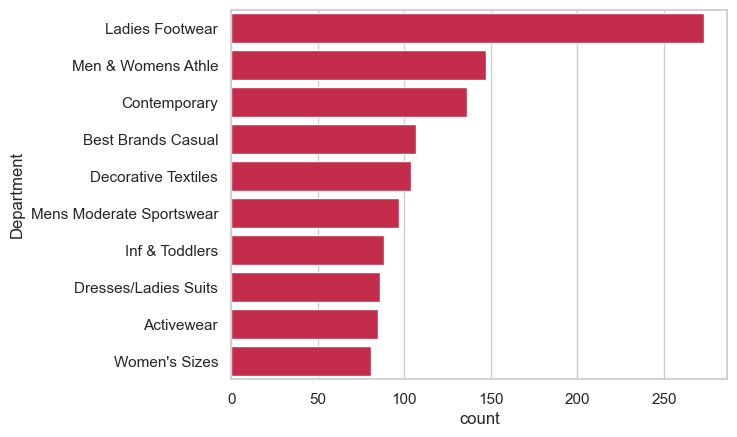


Categorical Column: Class

Denim             167
Pants             132
Shorts             99
Sandals            90
Sneakers           57
Skirts             53
Flats              40
Luxury             36
Womens Running     32
Jackets            31
Name: Class, dtype: int64


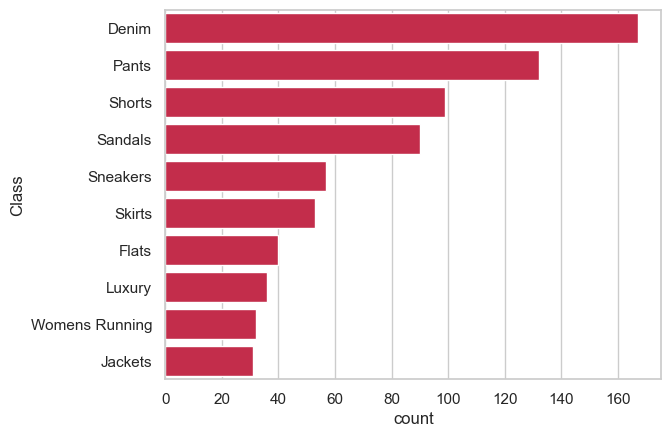


Categorical Column: Size

M               71
L               70
S               69
XL              59
Not-Clothing    58
XS              46
10              31
6               30
8               29
XXL             28
Name: Size, dtype: int64


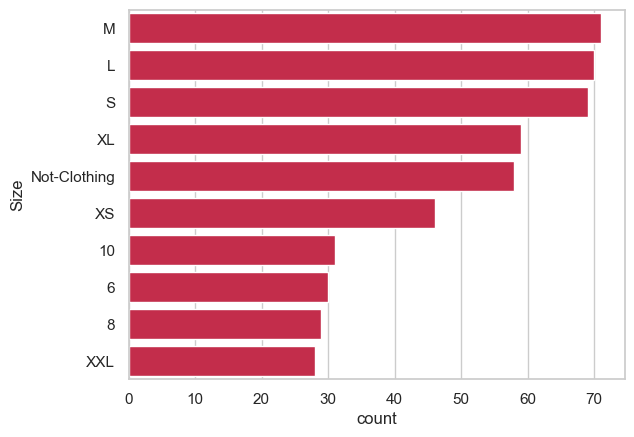

In [16]:
cat_cols = df.select_dtypes(include = 'object').head().columns
for cat in cat_cols:
    explore_categorical(cat,df)

There are a few things to be gathered from these visualizations. First and most important, is the sheer number of sales records for women's footwear relative to other departments. This is nearly doubled the next most prevelant department! For this reason, any promotional analysis or sales recors for this department should expect to have a disproportionate effect on the "big picture" of sales performance.

# Column `Size` Engineering

In [17]:
df['Size'].value_counts()

M               71
L               70
S               69
XL              59
Not-Clothing    58
                ..
10WW             1
10N              1
10.5WW           1
10.5 4E          1
25oz             1
Name: Size, Length: 433, dtype: int64

Even with the previously handled NaN values, there is still something that jumps out when viewing the `Size` column. Namely, this is the sheer amount of values appearing (nearly 440!). This won't enable conlcusions for this field without modification. 

In [18]:
deps = df['Department'].value_counts()

deps

Ladies Footwear              273
Men & Womens Athle           147
Contemporary                 136
Best Brands Casual           107
Decorative Textiles          104
Mens Moderate Sportswear      97
Inf & Toddlers                88
Dresses/Ladies Suits          86
Activewear                    85
Women's Sizes                 81
Mens Contemporary             69
Mens Best Brands              67
Casual Wear                   58
Bedding                       57
Junior Sportswear             36
Young Mens                    36
Knitwear                      31
Mens Furnishings              28
Handbags/Accessories          26
Bath Shop/Textiles            25
Mens Activewear               18
Mens Accessories/Giftware     16
Junior Drs/Swtr/Jkt           13
Gourmet Housewares             9
Treatment / Color              9
Bath  Body  Hair               8
Toys & Books                   7
Luggage/Accessories            6
Haircare                       6
Table Top                      5
Home Furni

As it stands, there are 433 representations of size in the merchandise, which is extremely high. In a similar way to the Null adjustment before, more entries can be funnelled into the Non Clothing category. While these might have sizings relevant to their type, they aren't compareable to conclusions drawn to clothing size analysis (i.e. King or Queen bedding sizes or Small/Large Cosmetics vs. Medium or Large clothing). It is for this reason, that the non-clothing objects will be grouped. This will radically reduce the size distributions.

In [19]:
to_repl = list(deps[-10:].index)
to_repl.append('Bedding')
to_repl.append('Bath Shop/Textiles')
to_repl.append('Gourmet Housewares')
to_repl.append('Decorative Textiles')
clothing_cols = list(deps.index)
for x in to_repl:
    clothing_cols.remove(x)
    
df[~df['Department'].isin(clothing_cols)]['Department'].value_counts()

Decorative Textiles       104
Bedding                    57
Bath Shop/Textiles         25
Gourmet Housewares          9
Treatment / Color           9
Bath  Body  Hair            8
Toys & Books                7
Luggage/Accessories         6
Haircare                    6
Table Top                   5
Home Furnishings            5
Seasonal Decorative         3
Fragrances                  3
Children's Accessories      1
Name: Department, dtype: int64

In [20]:
df.loc[~(df['Department'].isin(clothing_cols)), 'Size'] = 'Not-Clothing'

In [21]:
df['Size'].value_counts()

Not-Clothing    259
M                71
L                70
S                69
XL               59
               ... 
25/27             1
24/30             1
24/27             1
XS/14             1
33x27             1
Name: Size, Length: 331, dtype: int64

In order to further reduce the size category, we can group sizes that are the beginning of / or x, i.e. focusing on inseam length only. 



In [22]:
import re

# copy size Series
repl = df['Size']

# to add to Series
new = pd.Series({},dtype = str)

# for one index
for one in repl.index:
    # filter for inseam x length measurement (i.e. 32x30 and not 3XL)
    if (re.findall(r'x|X|/', repl[one]) and not (re.findall(r'l|L|s|S', repl[one]))):
        # normalize replacement vaue
        temp = repl[one].replace('/','x')
        temp =temp.replace('X','x')
        temp = temp.split('x') 
        # if original was 3X, ignore
        if temp[1] == '':
            continue
        # if original was European sizing, ignore first
        if len(temp) == 3:
            temp = temp[1:3]
        # take first value 
        temp = temp[0]
        # append
        new = pd.concat([new, pd.Series({one:temp})])


In [23]:
# reassign the corresponding index value pairs
df.loc[new.index,'Size'] = new.values

In [24]:
df.loc[new.index]

,Department,Class,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
1,Casual Wear,Denim,24,21,21,0,517.29,517.29,0.0,2,2,0,28.74,28.74,0.0
2,Casual Wear,Denim,24,73,68,5,1618.08,1518.08,100.0,4,0,4,75.00,0.00,75.0
4,Casual Wear,Denim,25,64,64,0,1599.36,1599.36,0.0,2,2,0,49.98,49.98,0.0
5,Casual Wear,Denim,25,31,31,0,759.70,759.70,0.0,0,0,0,0.00,0.00,0.0
7,Casual Wear,Denim,26,1,1,0,16.99,16.99,0.0,1,1,0,16.99,16.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,Mens Contemporary,Pants,34,16,0,16,320.00,0.00,320.0,1,0,1,20.00,0.00,20.0
1559,Mens Contemporary,Pants,35,13,13,0,495.88,495.88,0.0,5,5,0,185.95,185.95,0.0
1561,Mens Contemporary,Pants,36,9,9,0,335.92,335.92,0.0,2,2,0,41.99,41.99,0.0
1563,Mens Contemporary,Pants,38,20,20,0,791.80,791.80,0.0,1,1,0,35.99,35.99,0.0


In [25]:
df['Size'].value_counts()

Not-Clothing    259
M                71
L                70
S                69
XL               59
               ... 
XST               1
7.5WW             1
7.5N              1
7.5 4E            1
3.5               1
Name: Size, Length: 230, dtype: int64

All this modification reduced the size column by a factor of 2! 

A possible continuation could be to ignore sizes that have only 1 occurrence, but this wouldn't be wise. If this analysis was solely based on conclusions of size, the idea of ignoring one-off sized items could be valid. However, since there are multiple factors that these one-off sized items can contribute to, such as sale or full price profit margins, they will be preserved.

In [26]:
AVG PRICE per dep

SyntaxError: invalid syntax (2149321911.py, line 1)